<img src="https://raw.githubusercontent.com/saulocatharino/assistente_virtual/master/logobeetlabs.png" width=600>
<br><br>

<h1><b>MENTORIA PERSONALIZADA</b></h1><br>


---


## **ATUALIZANDO BIBLIOTECA PANDAS-DATAREADER**##

In [ ]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 8.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


## **CARREGANDO DADOS FINANCEIROS**##

In [ ]:
import pandas as pd
import datetime
import pandas_datareader.data as web

In [ ]:

inicio = datetime.datetime(2021, 1, 1)
fim = datetime.datetime(2022, 7, 1)

# Cria dicionário com 
nome_dos_ativos = ['Google', 'Apple', 'Nasdaq','Dow Jones','Ouro']
codigo_dos_ativos = ['GOOG','AAPL', '^IXIC', '^DJI', 'GOLD11.SA']


# Adquire o dataset através do Yahoo Financial https://finance.yahoo.com dos ativos da Google, Apple, Nasdaq e Dow Jones.

df_google = web.DataReader(codigo_dos_ativos[0], 'yahoo', inicio, fim)
df_apple = web.DataReader(codigo_dos_ativos[1], 'yahoo', inicio, fim)
df_nasdaq = web.DataReader(codigo_dos_ativos[2], 'yahoo', inicio, fim)
df_dow = web.DataReader(codigo_dos_ativos[3], 'yahoo', inicio,fim)
df_ouro = web.DataReader(codigo_dos_ativos[4], 'yahoo', inicio,fim)

df_ouro

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-08,10.55,10.30,10.35,10.46,1413897,10.46
2021-03-09,10.84,10.57,10.60,10.65,548309,10.65
2021-03-10,10.70,10.45,10.65,10.46,271734,10.46
2021-03-11,10.52,10.24,10.49,10.27,2354947,10.27
2021-03-12,10.31,10.16,10.25,10.27,339871,10.27
...,...,...,...,...,...,...
2022-06-10,9.98,9.61,9.69,9.90,2914695,9.90
2022-06-13,9.99,9.86,9.90,9.87,1715086,9.87
2022-06-14,9.95,9.79,9.86,9.87,1068972,9.87


In [ ]:
df_google

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,1760.650024,1707.849976,1757.540039,1728.239990,1901900,1728.239990
2021-01-05,1747.670044,1718.015015,1725.000000,1740.920044,1145300,1740.920044
2021-01-06,1748.000000,1699.000000,1702.630005,1735.290039,2602100,1735.290039
2021-01-07,1788.400024,1737.050049,1740.060059,1787.250000,2265000,1787.250000
2021-01-08,1809.839966,1773.535034,1787.979980,1807.209961,2050600,1807.209961
...,...,...,...,...,...,...
2022-06-09,2367.000000,2297.340088,2326.830078,2298.360107,1157100,2298.360107
2022-06-10,2269.939941,2217.219971,2255.625000,2228.550049,1566200,2228.550049
2022-06-13,2184.370117,2131.760986,2148.919922,2137.530029,1837800,2137.530029


In [ ]:
periodo = 2000
google = df_google['Close'][-periodo:]
apple = df_apple['Close'][-periodo:]
nasdaq = df_nasdaq['Close'][-periodo:]
dow = df_dow['Close'][-periodo:]
ouro = df_ouro['Close'][-periodo:]

In [ ]:
print(google[-60:].max())
print(apple[-60:].max())
print(nasdaq[-60:].max())
print(dow[-60:].max())
print(ouro[-60:].max())

2872.85009765625
178.9600067138672
14619.6396484375
35294.19140625
10.180000305175781


## **PLOTAGEM DO HISTÓRICO DAS AÇÕES**##

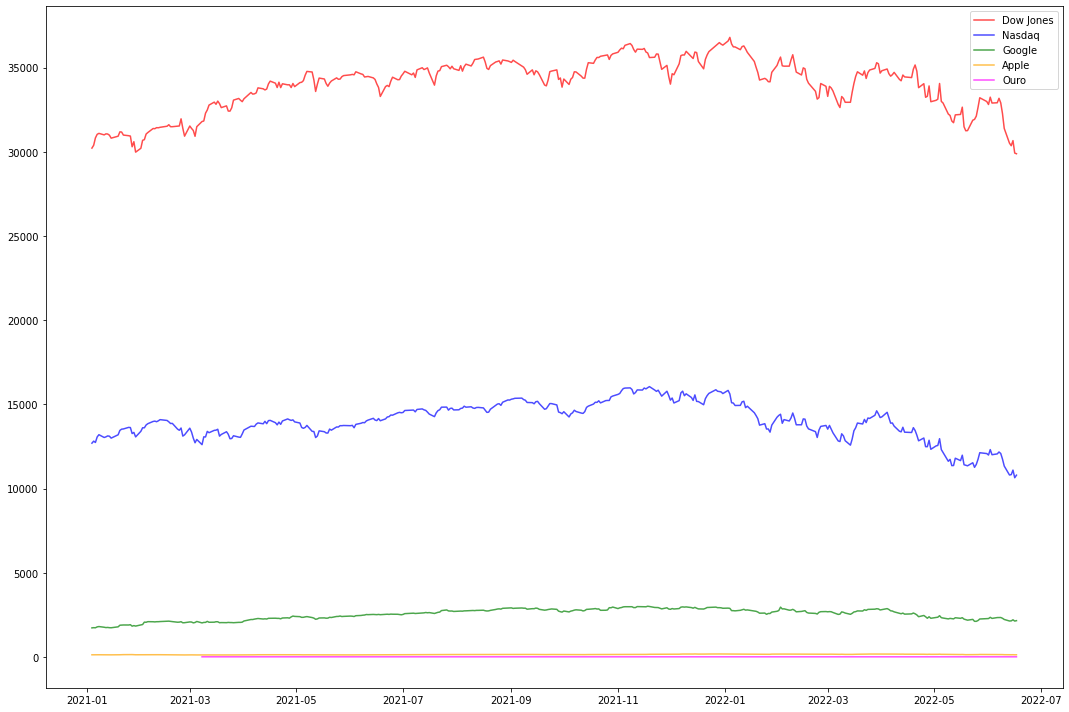

In [ ]:
import matplotlib.pyplot as plt

# Define a transparencia das linhas da plotagem 
transparencia = .7

# Cria lista com uma cor para cada ativo da lista
cores = ['red','blue','green','orange','magenta']

# Adquire apenas a coluna 'Close' dos dataframes dos ativos

fig, ax = plt.subplots(1, figsize=(15,10))


# Plotagem dos valores das ações no período selecionado de cada Ativo
ax.plot(dow, color='red', label="Dow Jones", alpha=transparencia);
ax.plot(nasdaq, color = 'blue', label="Nasdaq", alpha=transparencia);
ax.plot(google, color = 'green', label="Google", alpha=transparencia);
ax.plot(apple, color = 'orange', label="Apple", alpha=transparencia);
ax.plot(ouro, color='magenta', label="Ouro", alpha=transparencia);
ax.legend()

plt.tight_layout()

## **NORMALIZAÇÃO DOS VALORES PARA COMPARAÇÃO DE DINÂMICA**##

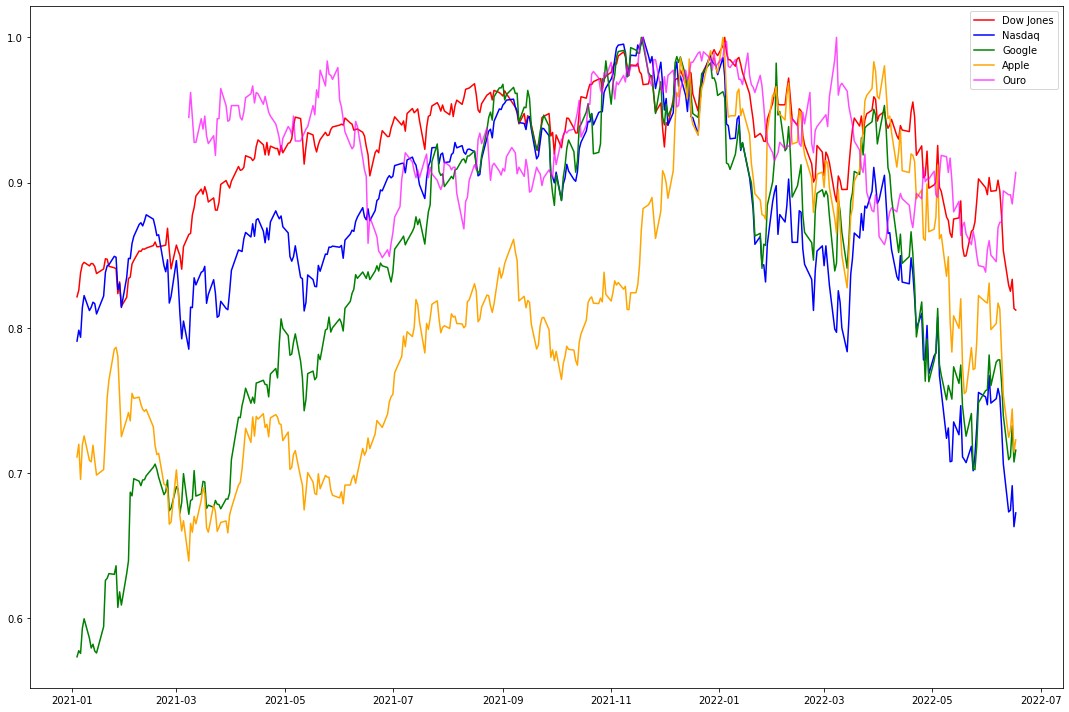

In [ ]:
# Normalização dos valores das ações
google_norm = google / google.max()
apple_norm = apple / apple.max()
nasdaq_norm = nasdaq / nasdaq.max()
dow_norm = dow / dow.max()
ouro = ouro / ouro.max()

fig, ax = plt.subplots(1, figsize=(15,10))


# Plotagem dos valores normalizados das ações no período selecionado de cada Ativo

ax.plot(dow_norm, color='red', label="Dow Jones");
ax.plot(nasdaq_norm, color = 'blue', label="Nasdaq");
ax.plot(google_norm, color = 'green', label="Google");
ax.plot(apple_norm, color = 'orange', label="Apple");
ax.plot(ouro, color='magenta', label="Ouro", alpha=transparencia)

ax.legend();

plt.tight_layout();


## **MÉDIAS MÓVEIS** ##

368

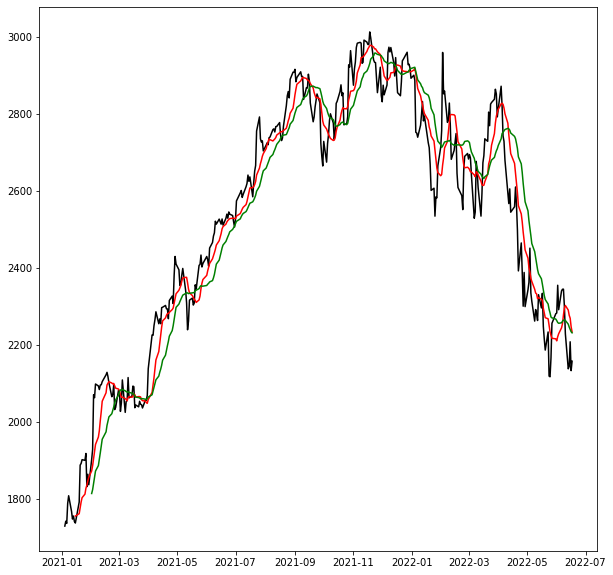

In [ ]:
# Calcula média móvel do ativo Google pela janela de 200 dias determinada no parâmetro 'window'
media_google_10 = google.rolling(window=10).mean()
media_google_20 = google.rolling(window=20).mean()

fig, ax = plt.subplots(1, figsize=(10,10))
ax.plot(google, color='black')
ax.plot(media_google_10, color = 'red')
ax.plot(media_google_20, color = 'green')

len(google)

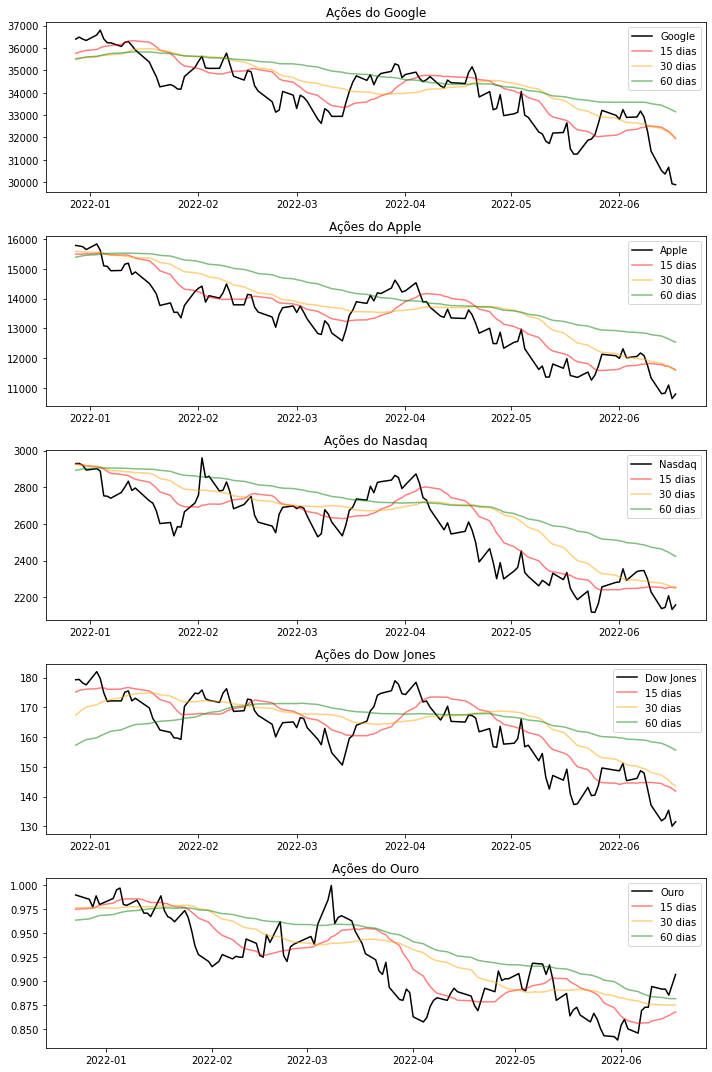

In [ ]:
# Define a transparencia das linhas da plotagem 
transparencia = .5

# Define o período para visualizaçao das médias
periodo = 120

# Cria lista com histórico dos valores dos ativos
valores = [dow,nasdaq,google,apple, ouro]


fig, ax = plt.subplots(5, figsize=(10,15))

for e, X in enumerate(valores):
  # Criando as médias móveis de 15,30,60 e 120 dias
  media_15 = X.rolling(window=15).mean()
  media_30 = X.rolling(window=30).mean()
  media_60 = X.rolling(window=60).mean()


  # Cria subplot
  ax[e].set_title("Ações do {}".format(nome_dos_ativos[e]))

  # Plotagem de X e das médias móveis
  ax[e].plot(X[-periodo:], color='black', label = nome_dos_ativos[e]);
  ax[e].plot(media_15[-periodo:], color='red', label = '15 dias', alpha = transparencia);
  ax[e].plot(media_30[-periodo:], color='orange', label = '30 dias', alpha = transparencia);
  ax[e].plot(media_60[-periodo:], color='green', label = '60 dias', alpha = transparencia);

  ax[e].legend();

plt.tight_layout()

## **CORRELAÇÃO** ##

In [ ]:
periodo = 5

# Função para cálculo de correlação entre os ativos Google e Apple no período selecionado
correlacao = google[-periodo:].corr(nasdaq[-periodo:])

# Normalização dos valores dos ativos

In [ ]:
print(correlacao)

0.9302561393585594


0.03690945663489127


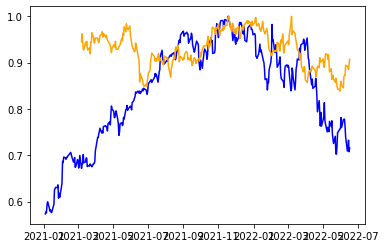

In [ ]:
# Período para cálculo de correlação
periodo = 60

# Função para cálculo de correlação entre os ativos Google e Apple no período selecionado
correlacao = google[-periodo:].corr(ouro[-periodo:])

# Normalização dos valores dos ativos Google e Apple 
google_norm = google / google.max()
ouro_norm = ouro / ouro.max()


# Plotagem dos valores dos ativos
plt.plot(google_norm, color ='blue')
plt.plot(ouro_norm, color='orange')


print(correlacao)

In [ ]:
for periodo in range(15,60):
  if periodo % 5 == 0:
    pass
  else:
    continue
  usadas = []
  print(f"Período: {periodo}")
  for e, X in enumerate(valores):
    for ee, XX in enumerate(valores):
      if e == ee:
        continue
      else:
        if [ee,e] not in usadas:
          correlacao = X[-periodo:].corr(XX[-periodo:])
          correlacao = round(correlacao * 100,2) 
          print("Correlação entre {} e {}: {}%".format(nome_dos_ativos[e], nome_dos_ativos[ee], correlacao))
          usadas.append([e,ee])
  print("-"*20)

Período: 15
Correlação entre Google e Apple: 99.36%
Correlação entre Google e Nasdaq: 92.29%
Correlação entre Google e Dow Jones: 98.59%
Correlação entre Google e Ouro: -87.37%
Correlação entre Apple e Nasdaq: 94.67%
Correlação entre Apple e Dow Jones: 99.13%
Correlação entre Apple e Ouro: -85.06%
Correlação entre Nasdaq e Dow Jones: 91.38%
Correlação entre Nasdaq e Ouro: -67.61%
Correlação entre Dow Jones e Ouro: -86.18%
--------------------
Período: 20
Correlação entre Google e Apple: 97.64%
Correlação entre Google e Nasdaq: 73.86%
Correlação entre Google e Dow Jones: 97.84%
Correlação entre Google e Ouro: -83.16%
Correlação entre Apple e Nasdaq: 84.84%
Correlação entre Apple e Dow Jones: 98.39%
Correlação entre Apple e Ouro: -77.16%
Correlação entre Nasdaq e Dow Jones: 78.88%
Correlação entre Nasdaq e Ouro: -40.24%
Correlação entre Dow Jones e Ouro: -80.43%
--------------------
Período: 25
Correlação entre Google e Apple: 97.41%
Correlação entre Google e Nasdaq: 72.34%
Correlação en

## **PREDIÇÃO DO HISTÓRICO E VALIDAÇÃO DE MODELO** ##

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Cria sequencia e prepara dados
a = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)

# Cria sequencia somando um valor adiante
b = a + 11 

print("Sequencia A: ", a.reshape(-1))
print("Sequencia B: ", b.reshape(-1))

print("-"*20)

# Determina o modelo utilizado no treinamento/predição
model_teste = LinearRegression()


# Treina modelo
model_teste.fit(a,b)


# Cria sequencia para testar modelo
c = np.array([55,56,57]).reshape(-1,1)


# Realiza a predição com o modelo treinado
predict = model_teste.predict(c)

print("Sequencia para predição: ", c.reshape(-1))
print("Sequencia predita: ", predict.reshape(-1))


Sequencia A:  [ 1  2  3  4  5  6  7  8  9 10]
Sequencia B:  [12 13 14 15 16 17 18 19 20 21]
--------------------
Sequencia para predição:  [55 56 57]
Sequencia predita:  [66. 67. 68.]


In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet

import warnings
warnings.filterwarnings("ignore")

# Determina a janela para construção dos lotes
periodo_para_teste = 65
dias_para_predizer = 10

# Determina o modelo
linear_model = LinearRegression()
elastic_model = ElasticNet(max_iter = 5000)

X = []
y = []

# Criação dos lotes para treinamento de modelo com dados do Google

for i in range(0, len(google) - periodo_para_teste - 1 - dias_para_predizer):
  X.append(google[i:i + periodo_para_teste])
  y.append(google[i + periodo_para_teste:i + periodo_para_teste + dias_para_predizer])


# Converte listas em array
y = np.array(y).reshape(len(y),-1)
X = np.array(X)


print("Quantidade de lotes de {} dias: {}".format(periodo_para_teste,len(y)))
print("-" * 20)
print("# Início de treinamento.")


# Treina os modelos
linear_model.fit(X,y);
elastic_model.fit(X,y);

print("# Treinamento Finalizado.")
print("-" * 20)


Quantidade de lotes de 50 dias: 312
--------------------
# Início de treinamento.
# Treinamento Finalizado.
--------------------


In [ ]:
# Adquire 50 dias das açoes do Google
teste = google[-periodo_para_teste:]

# Converte DataFrame para formato numpy e processa para prediçao
teste_ = teste.to_numpy().reshape(1,-1)

# Calcula prediçao utilizando o modelo linear
pred_teste = linear_model.predict(teste_)

print(teste_)
print(pred_teste)


[[2729.30004883 2680.20996094 2595.92993164 2567.48999023 2605.7199707
  2545.06005859 2559.2199707  2610.62011719 2564.90991211 2498.75
  2392.2800293  2465.         2390.12011719 2300.40991211 2388.22998047
  2299.33007812 2343.13989258 2362.59008789 2451.5        2334.92993164
  2313.19995117 2261.67993164 2291.68994141 2279.2199707  2263.2199707
  2330.31005859 2295.85009766 2334.0300293  2248.02001953 2214.90991211
  2186.26000977 2233.33007812 2118.52001953 2116.79003906 2165.91992188
  2255.97998047 2280.7800293  2282.73999023 2354.91992188 2291.2800293
  2340.20996094 2344.59008789 2344.76000977 2298.36010742 2228.55004883
  2137.5300293  2143.87988281 2207.81005859 2132.7199707  2157.31005859]]
[[2147.20903066 2232.00575399 2210.54039271 2210.35636912 2180.88789342]]


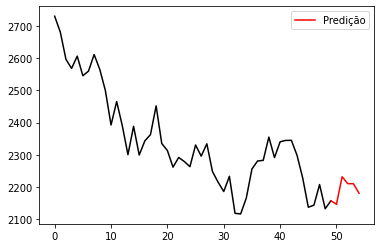

In [ ]:
fig, ax = plt.subplots(1)

# plota os valores dos 50 dias 
ax.plot(teste_.reshape(-1,), color='black');

x_ = np.arange(0,len(pred_teste[0]))

# Plota o valor da prediçao
ax.plot([periodo_para_teste-1, periodo_para_teste],[teste_.reshape(-1,)[-1],pred_teste[0][0]], color = 'red', label='Predição')

ax.plot(periodo_para_teste + x_  ,pred_teste[0], color='red');

ax.legend();

Margem de erro: 4.66%
Atual: 2157.31 
Mínima:2175.74 
Máxima: 2395.45


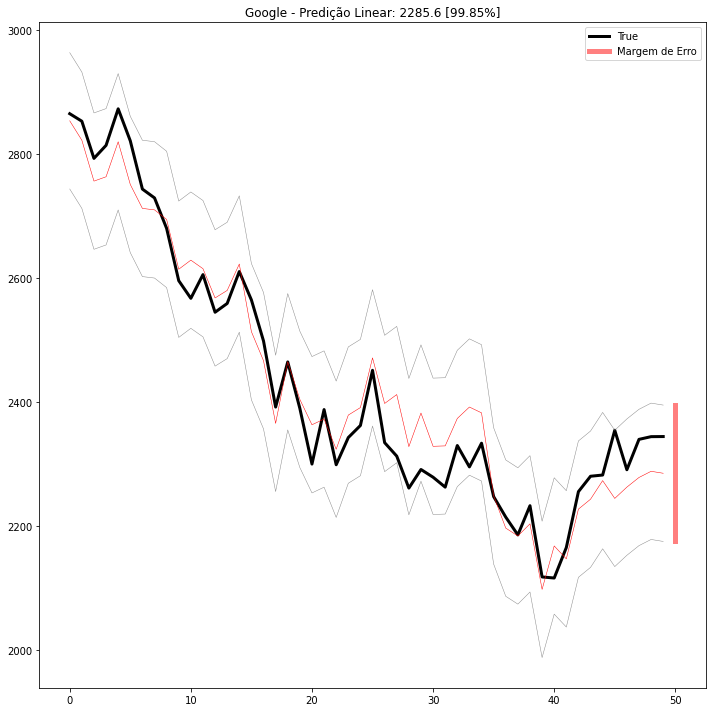

In [ ]:
# Adquire  o período mais recente para testar o modelo
x_test = X[-periodo_para_teste:]

# Calcula a predição do modelo usando o período mais recente
pred_linear = linear_model.predict(x_test)

# Calcula a diferença dos valores reais em relação aos valores preditos pelo modelo
diff_linear = y[-(periodo_para_teste + 5):-5][:,-1] - pred_linear[:,-1]

# Calcula a porcentagem da diferença da predição em relação aos valores reais
per = y[-(periodo_para_teste + 5): -5][:,-1] / 100
percent_linear = diff_linear / per

# Arredonda valor da precisão para 2 casas decimais
precisao_linear = round(100 - abs(percent_linear.mean()),2)

# Adquire o desvio máximo do erro da predição
max_deviation_linear = diff_linear.max()

# Soma o desvio máximo ao valor de Y 
pred_linear_add_max_deviation = pred_linear +  max_deviation_linear

# Subtrai o desvio máximo ao valor de Y 
pred_linear_sub_max_deviation = pred_linear -  max_deviation_linear

# Adquire a porcentagem do erro máximo da predição
margem_de_erro = percent_linear.max()
print("Margem de erro: {}%".format(round(margem_de_erro,2)))

# Calcula a predição mínima e máxima baseada na margem de erro
minima = round(pred_linear[-1][-1] - max_deviation_linear,2)
maxima = round(pred_linear[-1][-1] + max_deviation_linear,2)


print("Atual: {} ".format(round(google[-1],2)))
print("Mínima:{} ".format(minima))
print("Máxima: {}".format(maxima))



fig, ax = plt.subplots(1, figsize=(10,10))

# Plota histórico do Google
ax.plot(y[-(periodo_para_teste + 5): -5][:,-1], color='black', label='True', linewidth=3)



ax.set_title("Google - Predição Linear: {} [{}%]".format(round(pred_linear[-1][-1],2), precisao_linear))


# Plota desvios margem de erro máxima e mínima
ax.plot(pred_linear_sub_max_deviation[:,-1], color='gray', alpha=.9, linewidth=.5)
ax.plot(pred_linear_add_max_deviation[:,-1], color='gray', alpha=.9, linewidth=.5)


# Plota predição do modelo
ax.plot(pred_linear[:,-1], color='red', linewidth=.5)

# Plota a predição do modelo com a margem de erro
ax.plot((periodo_para_teste,periodo_para_teste),(minima,maxima), color='red', linewidth=5, alpha=.5, label='Margem de Erro')

ax.legend()

plt.tight_layout()

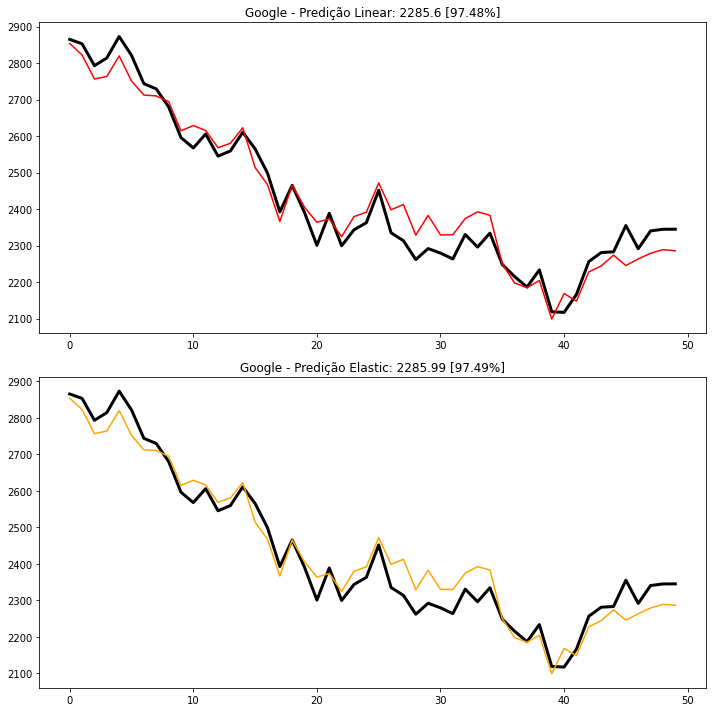

In [ ]:
# Adquire  o período mais recente para testar o modelo
x_test = X[-periodo_para_teste:]


# Calcula a predição do modelo usando o período mais recente
pred_linear = linear_model.predict(x_test)
pred_elastic = elastic_model.predict(x_test)


# Calcula a diferença dos valores reais em relação aos valores preditos pelo modelo
diff_linear = y[-(periodo_para_teste + 5):-5][:,-1] - pred_linear[:,-1]
diff_elastic = y[-(periodo_para_teste + 5):-5][:,-1] - pred_elastic[:,-1]


# Calcula a porcentagem da diferença da predição em relação aos valores reais
per = y[-(periodo_para_teste + 5): -5][:,-1] / 100
percent_linear = diff_linear / per
percent_elastic = diff_elastic / per

# Arredonda valor da precisão para 2 casas decimais
precisao_linear = round(100 - abs(percent_linear[-1].mean()),2)
precisao_elastic = round(100 - abs(percent_elastic[-1].mean()),2)


fig, ax = plt.subplots(2, figsize=(10,10))


ax[0].plot(y[-(periodo_para_teste + 5): -5][:,-1], color='black', label='True', linewidth=3)
ax[1].plot(y[-(periodo_para_teste + 5): -5][:,-1], color='black', label='True', linewidth=3)

ax[0].set_title("Google - Predição Linear: {} [{}%]".format(round(pred_linear[-1][-1],2), precisao_linear))

ax[1].set_title("Google - Predição Elastic: {} [{}%]".format(round(pred_elastic[-1][-1],2), precisao_elastic))



ax[1].set_title("Google - Predição Elastic: {} [{}%]".format(round(pred_elastic[-1][-1],2), precisao_elastic))


ax[0].plot(pred_linear[:,-1], color='red')
ax[1].plot( pred_elastic[:,-1], color='orange')


plt.tight_layout()

## **CLASSIFICAÇÃO DE TENDÊNCIA** ##

In [ ]:
# Classificação de tendência comparando o valor mais recente da ação com a predição

if pred_linear[-1][-1] > x_test[-1][-1]:
  tendencia_linear = 'Alta'
elif pred_linear[-1][-1] < x_test[-1][-1]:
  tendencia_linear = 'Baixa'
elif pred_linear[-1][-1] == x_test[-1][-1]:
  tendencia_linear = 'Estabilizar'



if pred_elastic[-1][-1] > x_test[-1][-1]:
  tendencia_elastic = 'Alta'
elif pred_elastic[-1][-1] < x_test[-1][-1]:
  tendencia_elastic = 'Baixa'
elif pred_elastic[-1][-1] == x_test[-1][-1]:
  tendencia_elastic = 'Estabilizar'

print("Predição de Tendência das Ações \n")
print("Tendência Linear: {}".format(tendencia_linear))
print("Tendência Elastic: {}".format(tendencia_elastic))



Predição de Tendência das Ações 

Tendência Linear: Baixa
Tendência Elastic: Baixa
